In [79]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-04-06 20:56:21,622: Credentials are already in use. The existing account in the session will be replaced.


In [80]:
qr =QuantumRegister(3,name='q')
crz=ClassicalRegister(1,name='crz')
crx =ClassicalRegister(1,name='crx')
qc=QuantumCircuit(qr,crz,crx)

In [81]:
def create_bell_pair(qc,a,b):
    qc.h(a)
    qc.cx(a,b)

In [82]:
def alice_gates(qc,psi,a):
    qc.cx(psi,a)
    qc.h(psi)


In [83]:
def measure_and_send(qr,a,b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [84]:
def bob_gates(qc,qubit,crz,crx):
    qc.x(qubit).c_if(crx,1)
    qc.z(qubit).c_if(crz,1)

<IPython.core.display.Latex object>

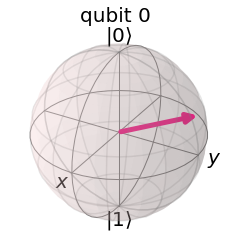

In [85]:
psi =random_state(1)
display(array_to_latex(psi,prefix="|\\psi\\rangle="))
plot_bloch_multivector(psi)

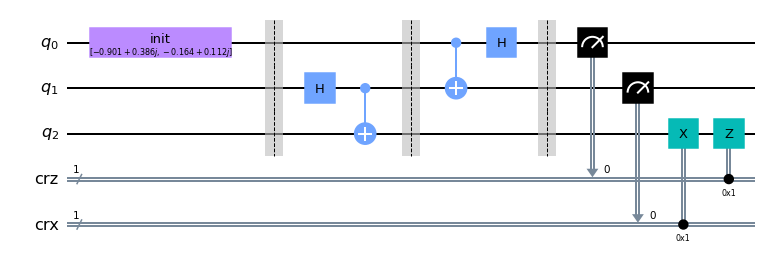

In [52]:
init_gate=Initialize(psi)
init_gate.label='init'
qc.append(init_gate,[0])
qc.barrier()
create_bell_pair(qc,1,2)
qc.barrier()
alice_gates(qc,0,1)
measure_and_send(qc,0,1)
bob_gates(qc,2,crz,crx)
qc.draw()


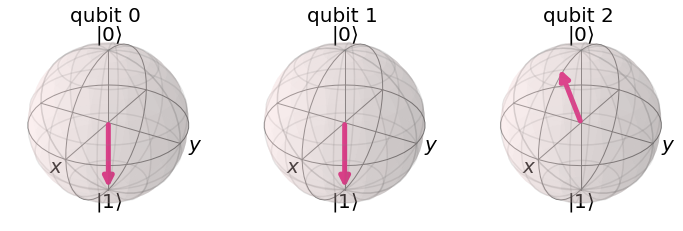

In [53]:

sim=Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector=sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

In [86]:
#usinng qasm sim
inverse_init_gate=init_gate.gates_to_uncompute()



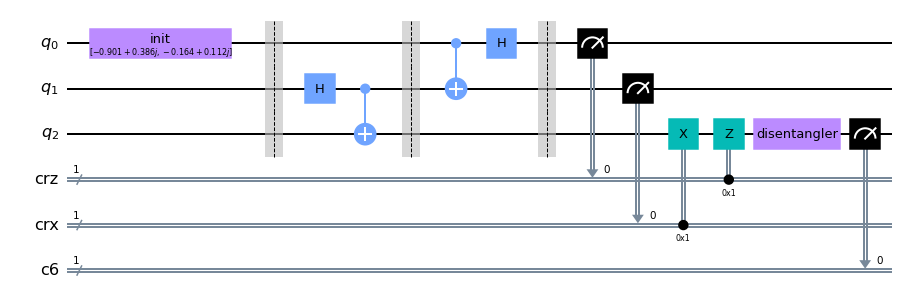

In [77]:
qc.append(init_gate,[0])
qc.barrier()
create_bell_pair(qc,1,2)
qc.barrier()
alice_gates(qc,0,1)
measure_and_send(qc,0,1)
bob_gates(qc,2,crz,crx)
qc.append(inverse_init_gate,[2])
cr_result=ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw()


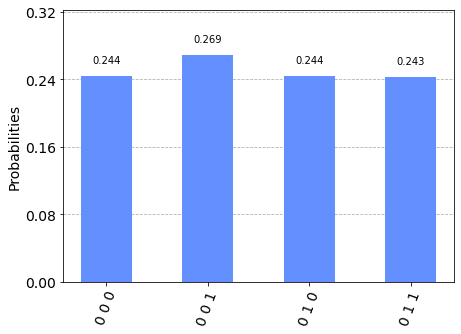

In [78]:
t_qc=transpile(qc,sim)
t_qc.save_statevector()
counts =sim.run(t_qc).result().get_counts()
plot_histogram(counts)

In [87]:
def new_bob_gates(qc,a,b,c):
    qc.cx(b,c)
    qc.cz(a,c)

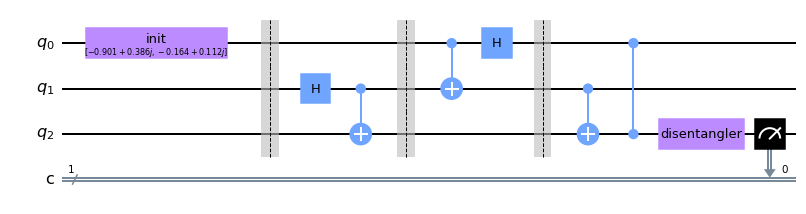

In [88]:
qc=QuantumCircuit(3,1)
qc.append(init_gate,[0])
qc.barrier()
create_bell_pair(qc,1,2)
qc.barrier()
alice_gates(qc,0,1)
qc.barrier()
#measure_and_send(qc,0,1)
new_bob_gates(qc,0,1,2)
qc.append(inverse_init_gate,[2])
#cr_result=ClassicalRegister(1)
#qc.add_register(cr_result)
qc.measure(2,0)
qc.draw()


In [91]:
IBMQ.load_account()
provider=IBMQ.get_provider(hub="ibm-q")
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
backend=least_busy(provider.backends(filters=lambda b:b.configuration().n_qubits>=3 and 
                                     not b.configuration().simulator and b.status().operational==True))
t_qc =transpile(qc,backend,optimization_level=3)
job=backend.run(t_qc)
job_monitor(job)

ibmqfactory.load_account:WARNING:2022-04-06 20:57:34,754: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


{'0': 3626, '1': 374}


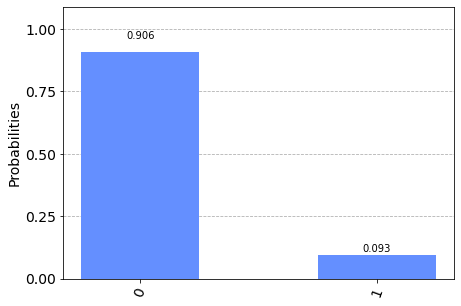

In [92]:
exp_result=job.result()
exp_counts =exp_result.get_counts(qc)
print(exp_counts)
plot_histogram(exp_counts)